In [1]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

In [2]:
# !unzip bank+marketing.zip 

In [3]:
# !unzip bank.zip

In [4]:
!ls

01-overview.md         09-explore-more.md     bank.zip
02-accuracy.md         README.md              homework.md
03-confusion-table.md  bank+marketing.zip     images
04-precision-recall.md bank+marketing.zip.1   meta.csv
05-roc.md              bank-additional.zip    meta.json
06-auc.md              bank-full.csv          my_homework_4.ipynb
07-cross-validation.md bank-names.txt         notebook.ipynb
08-summary.md          bank.csv


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [46]:
df = pd.read_csv('bank-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA and data transformation

In [47]:
df.y = df.y.apply(lambda x: int(x=='yes'))
df.y.unique()

array([0, 1])

In [48]:
columns = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]
df = df[columns]

In [49]:
list(df.dtypes[df.dtypes != 'object'].index)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [50]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
numerical_columns.remove('y')
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [51]:
categorical_columns =  list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
df_full_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=1)

In [54]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle=True, random_state=1)

In [55]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [56]:
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [57]:
del df_full_train['y']
del df_train['y']
del df_val['y']
del df_test['y']

# Question 1

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [59]:
checked_columns = [
    "balance",
    "day",
    "duration",
    "previous"
]

In [60]:
for col in checked_columns:
    score = roc_auc_score(y_train, df_train[col]).round(3)
    print(f"{col}: {score}")

balance: 0.589
day: 0.474
duration: 0.815
previous: 0.599


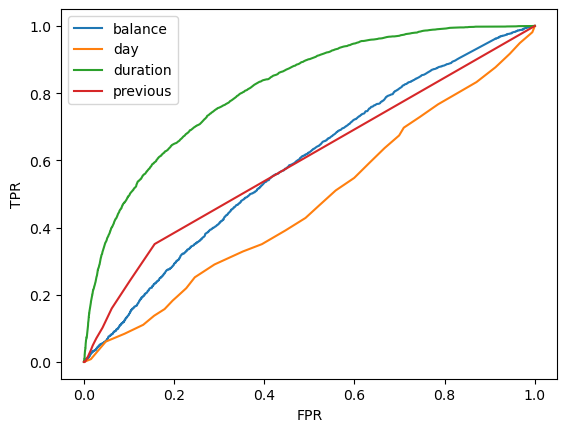

In [61]:
for col in checked_columns:
    fpr, tpr, threshold = roc_curve(y_train, df_train[col])
    plt.plot(fpr, tpr, label=col)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

### Question 1 answer: duration has the highest auc score

# Question 2

In [62]:
def train(df, y, C=1.0):
    dicts = df.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [63]:
def predict(dv, model, df):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred 

In [68]:
dv, model = train(df_train[numerical_columns + categorical_columns], y_train, C=1.0)
y_pred = predict(dv, model, df_val[numerical_columns + categorical_columns])
score = roc_auc_score(y_val, y_pred).round(8)
score

np.float64(0.90029099)

### Question 2 answer: 0.9 (0.89 is the closest one)

# Question 3

In [119]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [120]:
from sklearn.metrics import recall_score, precision_score

In [121]:
scores = []
for threshold in thresholds:
    scores.append(
        {
            'threshold': threshold,
            'recall': recall_score(y_val, y_pred >= threshold),
            'precision': precision_score(y_val, y_pred >= threshold)
        }
    )
scores_df = pd.DataFrame(scores).set_index('threshold')
scores_df

/Users/vpankrat/opt/anaconda3/envs/MLzoomcamp/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,recall,precision
threshold,,
0.00,1.000000,0.121433
0.01,0.996357,0.135212
0.02,0.995446,0.158912
0.03,0.989982,0.186417
0.04,0.973588,0.219688
...,...,...
0.96,0.027322,0.638298
0.97,0.022769,0.625000
0.98,0.019126,0.677419


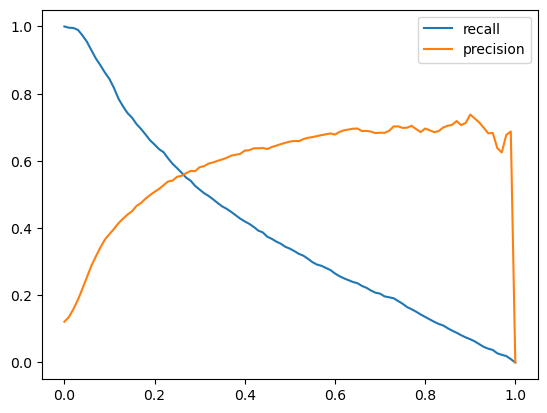

In [122]:
plt.plot(scores_df['recall'], label = 'recall')
plt.plot(scores_df['precision'], label = 'precision')
plt.legend()

In [123]:
from collections import Counter
Counter(y_pred >= 0.99)

Counter({np.False_: 9026, np.True_: 16})

In [124]:
last_before_cross = scores_df[scores_df.precision<scores_df.recall].reset_index().iloc[-1]['threshold']
first_after_cross = scores_df[scores_df.precision>=scores_df.recall].reset_index().iloc[0]['threshold']
print(f"last_before_cross: {last_before_cross}")
print(f"first_after_cross: {first_after_cross}")
print(f"crossing: {(last_before_cross + first_after_cross) /2 }")

last_before_cross: 0.26
first_after_cross: 0.27
crossing: 0.265


### Question 3 answer: 0.265

# Question 4

In [125]:
scores_df["f1-score"] = 2*scores_df.recall*scores_df.precision/(scores_df.recall+scores_df.precision)
scores_df

,recall,precision,f1-score
threshold,,,
0.00,1.000000,0.121433,0.216568
0.01,0.996357,0.135212,0.238111
0.02,0.995446,0.158912,0.274072
0.03,0.989982,0.186417,0.313754
0.04,0.973588,0.219688,0.358484
...,...,...,...
0.96,0.027322,0.638298,0.052402
0.97,0.022769,0.625000,0.043937
0.98,0.019126,0.677419,0.037201


#### Let's check that we calculated f1-score correctly

In [126]:
from sklearn.metrics import f1_score

In [127]:
f1_scores = np.array([f1_score(y_val, y_pred >= t) for t in thresholds])
np.mean(f1_scores - scores_df['f1-score']).round(10)

np.float64(-0.0)

In [128]:
print(scores_df.idxmax())

recall       0.00
precision    0.90
f1-score     0.22
dtype: float64


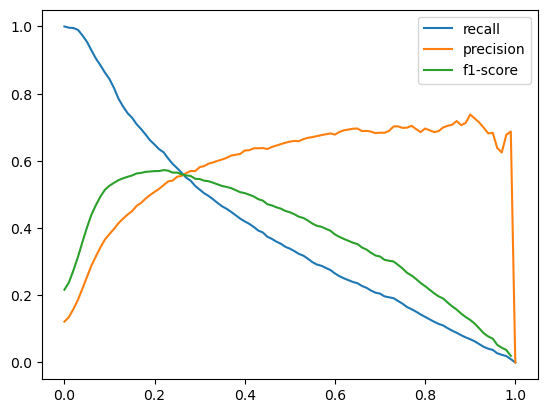

In [129]:
plt.plot(scores_df['recall'], label = 'recall')
plt.plot(scores_df['precision'], label = 'precision')
plt.plot(scores_df['f1-score'], label = 'f1-score')
plt.legend()

### Question 4 answer: Maximal f1 score is reached when threshold = 0.22

# Question 5